# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

Based on the **Materials and Methods** section of the paper, this data represents a total of 17 campaigns that occurred between May 2008 and November 2010

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Business Objective:**

Can we determine predict a client's subscription to a term deposit based on their circumstances of the situation at the time and their current status?

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
target = df['y'].map({'yes': 1, 'no': 0})

In [8]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [9]:
X = df[bank_features].replace('unknown', np.nan).dropna()
y = target[X.index]
print(X.shape)
X.head()

(30488, 7)


,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
6,59,admin.,married,professional.course,no,no,no


In [10]:
transformer = ColumnTransformer([
    ('scale', StandardScaler(), ['age']),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'), ['job', 'marital', 'education', 'default', 'housing', 'loan'])
])

This will feature engineer the columns once we put them through the transformer

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.head()

,age,job,marital,education,default,housing,loan
13510,36,admin.,single,high.school,no,yes,no
19974,38,technician,married,professional.course,no,yes,no
32016,51,self-employed,married,high.school,no,yes,no
16853,55,admin.,married,basic.4y,no,no,no
28160,43,services,married,professional.course,no,no,no


In [13]:
y_train.head()

13510    0
19974    1
32016    0
16853    0
28160    0
Name: y, dtype: int64

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

We can build a baseline where we just predict 0s since it's the majority class

In [14]:
y.value_counts()

y
0    26629
1     3859
Name: count, dtype: int64

In [15]:
y_baseline_train = np.zeros(len(y_train))
print('Baseline Score on Training: ', accuracy_score(y_baseline_train, y_train))

Baseline Score on Training:  0.8743337433374334


In [16]:
y_baseline_test = np.zeros(len(y_test))
print('Baseline Score on Testing: ', accuracy_score(y_baseline_test, y_test))

Baseline Score on Testing:  0.8697933748770088


These are the baselines scores we want to beat under a reasonable amount of time

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [17]:
logistic_pipe = Pipeline([
    ('transformer', transformer),
    ('model', LogisticRegression(max_iter=1000))
])

start_time = time.time()
logistic_pipe.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time

### Problem 9: Score the Model

What is the accuracy of your model?

In [18]:
train_preds = logistic_pipe.predict(X_train)
test_preds = logistic_pipe.predict(X_test)

print("Training Score: ", accuracy_score(train_preds, y_train))
print("Testing Score: ", accuracy_score(test_preds, y_test))

Training Score:  0.8743337433374334
Testing Score:  0.8697933748770088


Note the scores are identical to our baseline guess 0.

In [19]:
(train_preds == 1).sum()

0

In [20]:
(test_preds == 1).sum()

0

Seems the logistic pipe deemed it was also best to predict 0 on each prediction

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [21]:
findings = {"Model": [], "Train Time": [], "Train Accuracy": [], "Test Accuracy": []}
findings['Model'].append("Logistic Regression")
findings['Train Time'].append(np.round(train_time, 4))
findings["Train Accuracy"].append(accuracy_score(train_preds, y_train))
findings["Test Accuracy"].append(accuracy_score(test_preds, y_test))
findings

{'Model': ['Logistic Regression'],
 'Train Time': [0.1852],
 'Train Accuracy': [0.8743337433374334],
 'Test Accuracy': [0.8697933748770088]}

In [22]:
knn_pipe = Pipeline([
    ('transformer', transformer),
    ('model', KNeighborsClassifier())
])

start_time = time.time()
knn_pipe.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time

train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)

findings['Model'].append("K Nearest Neighbors")
findings['Train Time'].append(np.round(train_time, 4))
findings["Train Accuracy"].append(accuracy_score(train_preds, y_train))
findings["Test Accuracy"].append(accuracy_score(test_preds, y_test))
findings

{'Model': ['Logistic Regression', 'K Nearest Neighbors'],
 'Train Time': [0.1852, 0.0361],
 'Train Accuracy': [0.8743337433374334, 0.8767117671176712],
 'Test Accuracy': [0.8697933748770088, 0.8550344375204986]}

In [23]:
tree_pipe = Pipeline([
    ('transformer', transformer),
    ('model', DecisionTreeClassifier())
])

start_time = time.time()
tree_pipe.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time

train_preds = tree_pipe.predict(X_train)
test_preds = tree_pipe.predict(X_test)

findings['Model'].append("Decision Tree")
findings['Train Time'].append(np.round(train_time, 4))
findings["Train Accuracy"].append(accuracy_score(train_preds, y_train))
findings["Test Accuracy"].append(accuracy_score(test_preds, y_test))
findings

{'Model': ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree'],
 'Train Time': [0.1852, 0.0361, 0.19],
 'Train Accuracy': [0.8743337433374334,
  0.8767117671176712,
  0.9016810168101681],
 'Test Accuracy': [0.8697933748770088, 0.8550344375204986, 0.851426697277796]}

In [25]:
svm_pipe = Pipeline([
    ('transformer', transformer),
    ('model', svm.SVC())
])

start_time = time.time()
svm_pipe.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time

train_preds = svm_pipe.predict(X_train)
test_preds = svm_pipe.predict(X_test)

findings['Model'].append("Support Vector Machines")
findings['Train Time'].append(np.round(train_time, 4))
findings["Train Accuracy"].append(accuracy_score(train_preds, y_train))
findings["Test Accuracy"].append(accuracy_score(test_preds, y_test))
findings

{'Model': ['Logistic Regression',
  'K Nearest Neighbors',
  'Decision Tree',
  'Support Vector Machines'],
 'Train Time': [0.1852, 0.0361, 0.19, 8.8532],
 'Train Accuracy': [0.8743337433374334,
  0.8767117671176712,
  0.9016810168101681,
  0.8743337433374334],
 'Test Accuracy': [0.8697933748770088,
  0.8550344375204986,
  0.851426697277796,
  0.8697933748770088]}

In [26]:
findings_df = pd.DataFrame(findings)
findings_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.1852,0.874334,0.869793
1,K Nearest Neighbors,0.0361,0.876712,0.855034
2,Decision Tree,0.1900,0.901681,0.851427
3,Support Vector Machines,8.8532,0.874334,0.869793


Let's expand our findings via plotting the results

(0.0, 1.0)

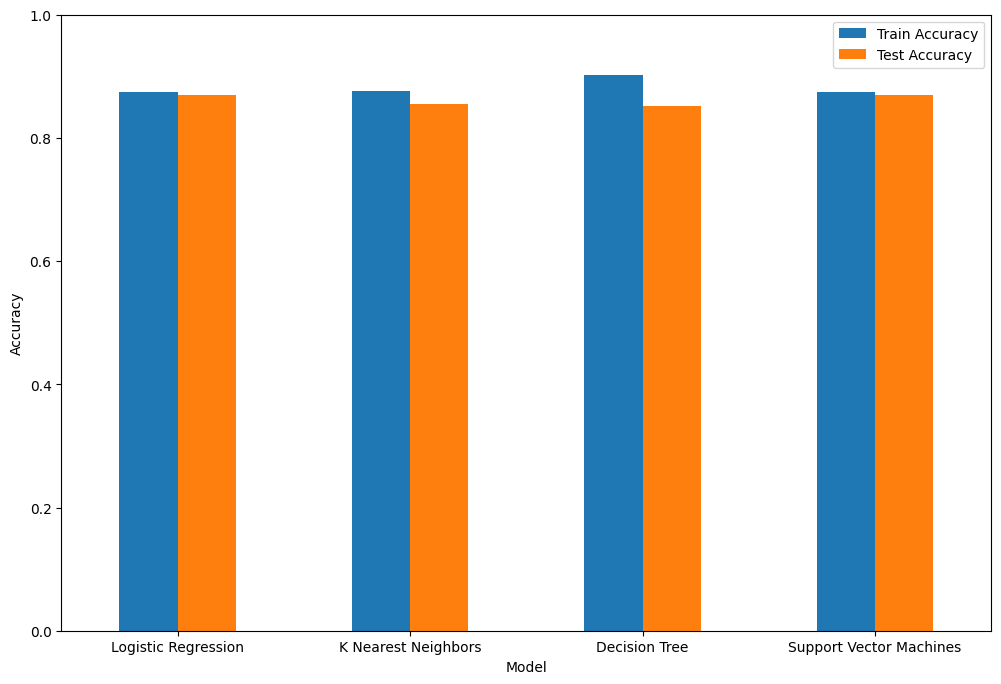

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = findings_df.plot.bar(x='Model', y=['Train Accuracy', 'Test Accuracy'], rot=0, figsize=(12, 8), ylabel="Accuracy")
plt.ylim(top=1)

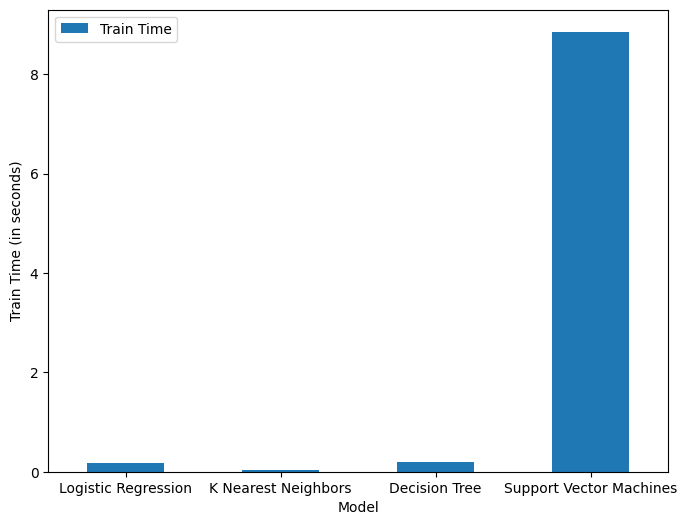

In [28]:
ax = findings_df.plot.bar(x='Model', y='Train Time', rot=0, figsize=(8, 6), ylabel = "Train Time (in seconds)")

Just from the baseline performance, **support vector machines** is the best performing as it has the highest test accuracy. However, as we see in the *Train Time*, it takes more than 10 times the time to trian vs the other classifiers. **K nearest neighbors** is the fastest in training but it also has the 2nd worse performance. The worst performance meanwhile goes to the **decision tree** model. Overall, the best performing model here with ideal train time was logistic Regression. However the greatest test accuracy was only as good as the baseline model. Similarly, the k nearest neighbors and decision trees had better train accuracy than the baseline despite worse test accuracy, indicating overfitting.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

First we'll build a function below which will help us hypertune each model as well as use cross validation to further improve them:

In [30]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_tuner(model, param_grid, transformer, X_train, y_train):
    
    pipe = Pipeline([
        ("transformer", transformer),
        ("model", model)
    ])
    
    grid = GridSearchCV(
        pipe,
        param_grid = param_grid,
        scoring = "accuracy",
        cv = 5#,
        #verbose=2
    )
    
    start = time.time()
    grid.fit(X_train, y_train)
    end = time.time()
    
    print(f"\nBest Params for {type(model).__name__}: {grid.best_params_}")
    print(f"Best Mean Accuracy: {grid.best_score_:.4f}")
    print(f"Training (CV) Time: {end - start:.2f} sec")
    
    return grid, end - start

The above function will run the grid search and cv along with giving us the best grid parameters and training time found. We'll then run the grid parameters found on the full train set.

Let organize the parameter grid we'll run for each model during hyper tuning:

**Logistic Regession**
- norm of penalty
- regularization strength
- optimization algorithm
- weights associated with classes

**KNN**
- number of neighbors
- method of weights
- power parameter

**Decision Tree**
- criterion
- max depth of tree
- min number of samples required for split
- min number of samples required to be a leaf node
- weights associated with classes

**Support Vector Machines**
- Regularization Parameter
- Kernel Type
- Gamma Value
- weights associated with classes

In [31]:
param_grids = {
    "Logistic Regression": {
        'model__penalty' : ['l1', 'l2'],
        'model__C': [0.01, 0.1, 1, 10],
        'model__solver': ['liblinear'],
        'model__class_weight': [None, 'balanced']
    },
    "KNN": {
        'model__n_neighbors': [5, 10, 15, 20, 25],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2],
    },
    "Decision Tree": {
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [1, 2, 3, 4, None],
        'model__min_samples_split': [2, 3, 4],
        'model__min_samples_leaf': [2, 3, 4],
        'model__class_weight': [None, 'balanced']
    },
    "SVC": {
        'model__C': [0.1, 1],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto'],
        'model__class_weight': [None, 'balanced']
    }
}

In [32]:
grid, train_time = hyperparameter_tuner(LogisticRegression(max_iter=1000), param_grids['Logistic Regression'], transformer, X_train, y_train)
params = grid.best_params_
print()
print()

logistic_pipe = Pipeline([
    ('transformer', transformer),
    ('model', LogisticRegression(max_iter=1000, 
                                 C = params['model__C'],
                                class_weight = params['model__class_weight'],
                                penalty = params['model__penalty'],
                                solver = params['model__solver']))
])

start_time = time.time()
logistic_pipe.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time

train_preds = logistic_pipe.predict(X_train)
test_preds = logistic_pipe.predict(X_test)

hypertuned_findings = {"Model": [], "Train Time": [], "Train Accuracy": [], "Test Accuracy": []}

### BASELINE:

# 0.8743337433374334
# 0.8697933748770088

hypertuned_findings['Model'].append("Logistic Regression")
hypertuned_findings['Train Time'].append(np.round(train_time, 4))
hypertuned_findings["Train Accuracy"].append(accuracy_score(train_preds, y_train))
hypertuned_findings["Test Accuracy"].append(accuracy_score(test_preds, y_test))
hypertuned_findings


Best Params for LogisticRegression: {'model__C': 0.01, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best Mean Accuracy: 0.8743
Training (CV) Time: 10.34 sec




{'Model': ['Logistic Regression'],
 'Train Time': [0.6535],
 'Train Accuracy': [0.8743337433374334],
 'Test Accuracy': [0.8697933748770088]}

In [33]:
grid, train_time = hyperparameter_tuner(KNeighborsClassifier(), param_grids['KNN'], transformer, X_train, y_train)
params = grid.best_params_
print()
print()

knn_pipe = Pipeline([
    ('transformer', transformer),
    ('model', KNeighborsClassifier(n_neighbors = params['model__n_neighbors'],
                                weights = params['model__weights'],
                                p = params['model__p']))
])

start_time = time.time()
knn_pipe.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time

train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)

hypertuned_findings['Model'].append("K Nearest Neighbors")
hypertuned_findings['Train Time'].append(np.round(train_time, 4))
hypertuned_findings["Train Accuracy"].append(accuracy_score(train_preds, y_train))
hypertuned_findings["Test Accuracy"].append(accuracy_score(test_preds, y_test))
hypertuned_findings


Best Params for KNeighborsClassifier: {'model__n_neighbors': 25, 'model__p': 1, 'model__weights': 'uniform'}
Best Mean Accuracy: 0.8732
Training (CV) Time: 142.48 sec




{'Model': ['Logistic Regression', 'K Nearest Neighbors'],
 'Train Time': [0.6535, 0.0179],
 'Train Accuracy': [0.8743337433374334, 0.8744157441574416],
 'Test Accuracy': [0.8697933748770088, 0.8693014102984585]}

In [34]:
grid, train_time = hyperparameter_tuner(DecisionTreeClassifier(), param_grids['Decision Tree'], transformer, X_train, y_train)
params = grid.best_params_
print()
print()

tree_pipe = Pipeline([
    ('transformer', transformer),
    ('model', DecisionTreeClassifier(criterion=params['model__criterion'],
                                    max_depth=params['model__max_depth'],
                                    min_samples_split=params['model__min_samples_split'],
                                    min_samples_leaf=params['model__min_samples_leaf'],
                                    class_weight=params['model__class_weight']))
])

start_time = time.time()
tree_pipe.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time

train_preds = tree_pipe.predict(X_train)
test_preds = tree_pipe.predict(X_test)

hypertuned_findings['Model'].append("Decision Tree")
hypertuned_findings['Train Time'].append(np.round(train_time, 4))
hypertuned_findings["Train Accuracy"].append(accuracy_score(train_preds, y_train))
hypertuned_findings["Test Accuracy"].append(accuracy_score(test_preds, y_test))
hypertuned_findings


Best Params for DecisionTreeClassifier: {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2}
Best Mean Accuracy: 0.8743
Training (CV) Time: 43.94 sec




{'Model': ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree'],
 'Train Time': [0.6535, 0.0179, 0.0198],
 'Train Accuracy': [0.8743337433374334,
  0.8744157441574416,
  0.8743337433374334],
 'Test Accuracy': [0.8697933748770088, 0.8693014102984585, 0.8697933748770088]}

In [35]:
grid, train_time = hyperparameter_tuner(svm.SVC(), param_grids['SVC'], transformer, X_train, y_train)
params = grid.best_params_
print()
print()

svm_pipe = Pipeline([
    ('transformer', transformer),
    ('model', svm.SVC(C = params['model__C'],
                     kernel = params['model__kernel'],
                     gamma = params['model__gamma'],
                     class_weight = params['model__class_weight']))
])

start_time = time.time()
svm_pipe.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time

train_preds = svm_pipe.predict(X_train)
test_preds = svm_pipe.predict(X_test)

hypertuned_findings['Model'].append("Support Vector Machines")
hypertuned_findings['Train Time'].append(np.round(train_time, 4))
hypertuned_findings["Train Accuracy"].append(accuracy_score(train_preds, y_train))
hypertuned_findings["Test Accuracy"].append(accuracy_score(test_preds, y_test))
hypertuned_findings


Best Params for SVC: {'model__C': 0.1, 'model__class_weight': None, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Best Mean Accuracy: 0.8743
Training (CV) Time: 507.07 sec




{'Model': ['Logistic Regression',
  'K Nearest Neighbors',
  'Decision Tree',
  'Support Vector Machines'],
 'Train Time': [0.6535, 0.0179, 0.0198, 2.782],
 'Train Accuracy': [0.8743337433374334,
  0.8744157441574416,
  0.8743337433374334,
  0.8743337433374334],
 'Test Accuracy': [0.8697933748770088,
  0.8693014102984585,
  0.8697933748770088,
  0.8697933748770088]}

In [51]:
hypertuned_findings_df = pd.DataFrame(hypertuned_findings)
hypertuned_findings_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.6535,0.874334,0.869793
1,K Nearest Neighbors,0.0179,0.874416,0.869301
2,Decision Tree,0.0198,0.874334,0.869793
3,Support Vector Machines,2.7820,0.874334,0.869793


Overall results seem to be that in terms of accuracy improvement, all 3 models that aren't the K nearest neighbors have similar performance to the baseline model in both trainig and accuracy. **KNN** is clearly the outlier here so we can label it as the worst of the model here in terms of performance. As for the best, it seems to be the **Decision Tree** as it has the highest performance and the lowest train time of the 3 best models.

(0.0, 1.0)

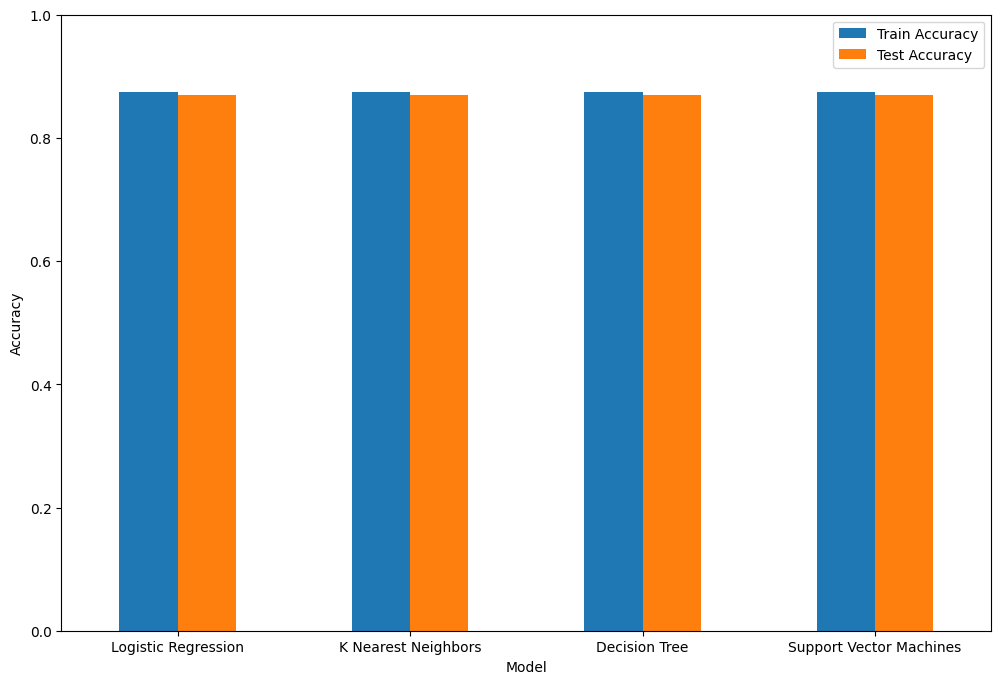

In [54]:
import matplotlib.pyplot as plt

ax = hypertuned_findings_df.plot.bar(x='Model', y=['Train Accuracy', 'Test Accuracy'], rot=0, figsize=(12, 8), ylabel="Accuracy")
plt.ylim(top=1)

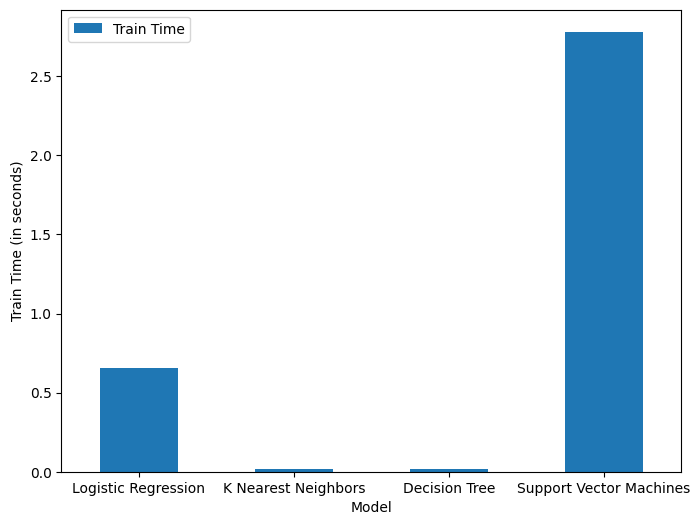

In [55]:
ax = hypertuned_findings_df.plot.bar(x='Model', y='Train Time', rot=0, figsize=(8, 6), ylabel = "Train Time (in seconds)")

We decide to explore what was the main feature of interest for the tree here. It seems to be age was deemed the most important for prediction on the given dataset. Greater depths were deemed non beneficial for the model and as such it seems to only rely on age here for making predictions.

[Text(0.5, 0.75, 'age <= 1.97\ngini = 0.22\nsamples = 24390\nvalue = [21325, 3065]'),
 Text(0.25, 0.25, 'gini = 0.206\nsamples = 23677\nvalue = [20909, 2768]'),
 Text(0.75, 0.25, 'gini = 0.486\nsamples = 713\nvalue = [416, 297]')]

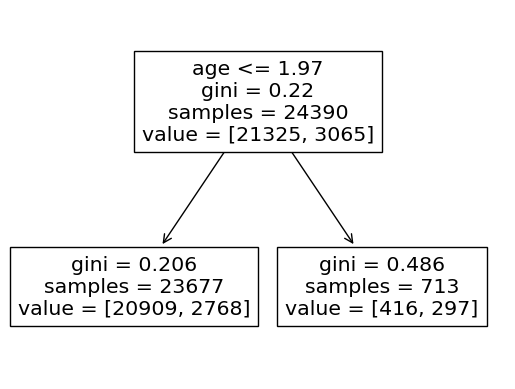

In [56]:
from sklearn import tree

tree.plot_tree(tree_pipe.named_steps['model'],
              feature_names=bank_features)

**Overall next step recommendations:**

1. Potentially research or feature engineer new features as these current ones seem in effective to the goal of accuracy
2. Alternatively, change the score metric depending on the focus of the business question and the goals of the bank (for instance, perhaps more interested in customers that do deposit than those that don't)
3. Further improve upon current (wouldn't recommend as base settings seem to be the accuracy ceiling but is an option)